# 理財機器人回測－單因子策略

- Made by Alex Chiang
- 作者 江祐宏
- 2021/8/23 update
- GitHub 需另開分支

## 更新部份
1. yahoo 調整後收盤價 改為 TEJ 調整後收盤價，價格略有不同（影響部分結果）
2. 原先是以 2020 看到的市值最大做回測，調整成「投資前篩選出市值最大的股票池」（大幅影響結果）

## 有空時微調整交易邏輯
1. 加入 end_time，可做樣本內最佳化
2. 交易時間改為訊號下一個交易日（每次少記一天報酬）
3. 無法執行交易的條件，進行報錯處理

In [1]:
# 傳入回測模組
from module.backtest import Backtest

# 資料夾相對路徑
import os
path = os.getcwd()

### 策略回測
可以自行調整參數，套件內部有參數的詳細說明

In [2]:
Backtest_alpha = Backtest(beginning_money = 100,
                          start_day = '1973-01-01', 
                          scale_select = 'max',
                          scale_num = 100,
                          strategy = 'alpha',
                          feature_select = 'max',
                          feature_period = 240, 
                          stock_num = 10, 
                          max_percentage = 0.12, 
                          rebalance = 60, 
                          dynamic_rebalance = False, 
                          stop_loss = 0.3)

In [3]:
acc_return = Backtest_alpha.portfolio_benchmark
acc_return

,portfolio,benchmark
Date,,
1973-01-04,100.000000,100.000000
1973-01-05,101.152107,100.202020
1973-01-06,101.144458,100.111756
1973-01-08,101.468732,98.469804
1973-01-09,101.342526,98.783580
...,...,...
2021-08-16,112153.649310,7246.421663
2021-08-17,107402.312579,7161.573179
2021-08-18,112308.529363,7232.452181


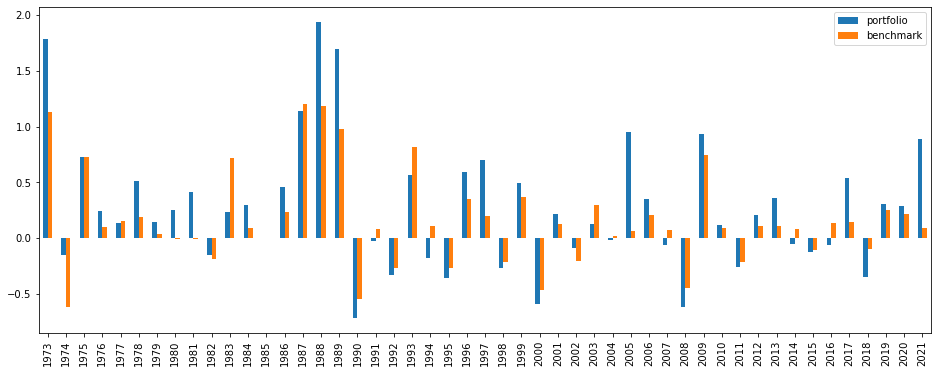

In [4]:
# 含複利成份之參考就好的年度報酬
annual_acc_return = (acc_return.resample('Y').last() / acc_return.resample('Y').first()) - 1
annual_acc_return.index = [str(i)[0:4] for i in annual_acc_return.index]
annual_acc_return.plot(kind = 'bar', figsize=(16, 6));

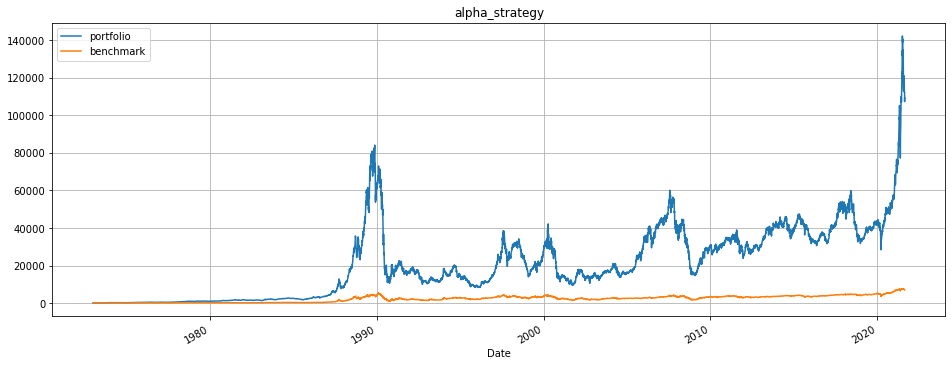

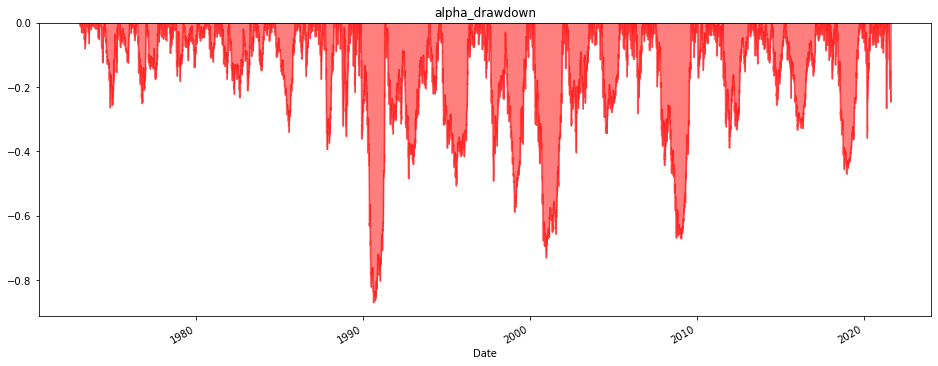

In [5]:
Backtest_alpha.show_portfolio()

In [6]:
# 結果論的績效指標，當作參考就好（過度依賴頭尾效應，有空應新增更有意義的指標）
# 觀察上圖，其實這不是一個好的因子、好的策略

Backtest_alpha.show_index(index = 'All')

 <Strategy> 
 Max_drawdown: 0.869 
 Accumulation_return: 1092.7818 
 Annual_return: 0.1408 
 Annual_volatility: 0.2752 
 Neg_annual_volatility: 0.1697 
 Sharpe_ratio: 0.5116 
 Sortino_ratio: 0.8298 
 Calmar_ratio: 0.162 
 
 <Benchmark> 
 Max_drawdown: 0.7951 
 Accumulation_return: 69.2424 
 Annual_return: 0.0833 
 Annual_volatility: 0.238 
 Neg_annual_volatility: 0.1471 
 Sharpe_ratio: 0.3502 
 Sortino_ratio: 0.5667 
 Calmar_ratio: 0.1048


## 規模因子是否能贏大盤？

In [13]:
Backtest_scale = Backtest(beginning_money = 100,
                          start_day = '1973-01-01', 
                          scale_select = 'min',
                          scale_num = 200,
                          strategy = 'skew1', # 隨便設一個就好
                          feature_select = 'max',
                          feature_period = 240, 
                          stock_num = 200, 
                          max_percentage = 0.005, 
                          rebalance = 240, 
                          dynamic_rebalance = False, 
                          stop_loss = 0.3)

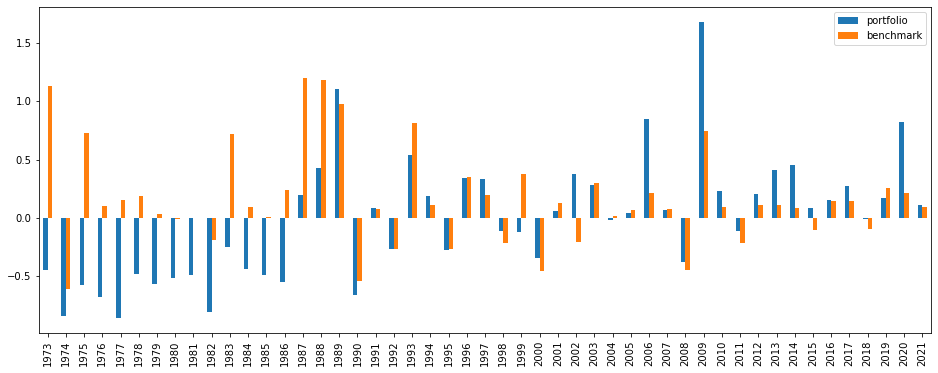

In [14]:
acc_return = Backtest_scale.portfolio_benchmark
annual_acc_return = (acc_return.resample('Y').last() / acc_return.resample('Y').first()) - 1
annual_acc_return.index = [str(i)[0:4] for i in annual_acc_return.index]
annual_acc_return.plot(kind = 'bar', figsize=(16, 6));

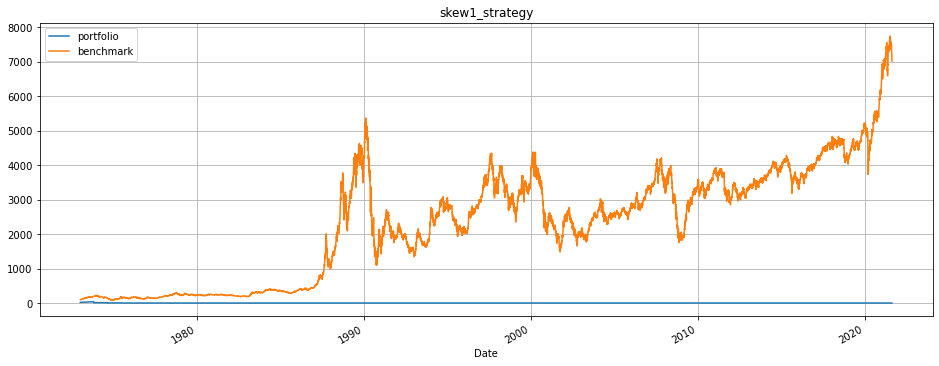

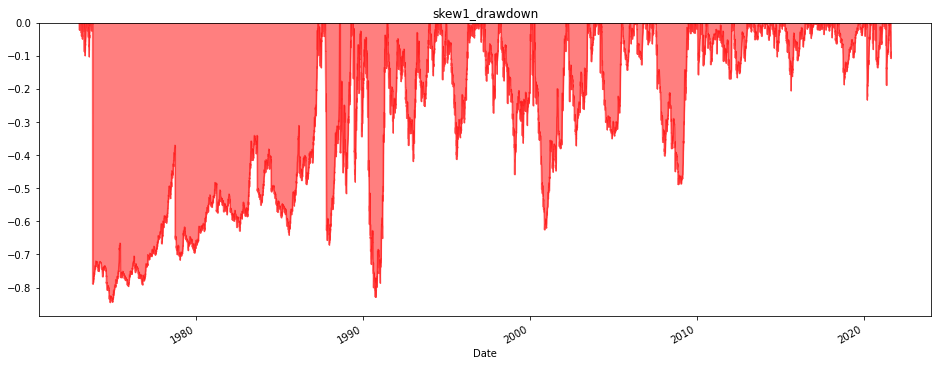

In [15]:
Backtest_scale.show_portfolio()

## 規模因子與高偏態股票

In [16]:
Backtest_scale_skew = Backtest(beginning_money = 100,
                               start_day = '1973-01-01', 
                               scale_select = 'min',
                               scale_num = 200,
                               strategy = 'skew1',
                               feature_select = 'max',
                               feature_period = 240, 
                               stock_num = 50, 
                               max_percentage = 0.02, 
                               rebalance = 240, 
                               dynamic_rebalance = False, 
                               stop_loss = 0.3)

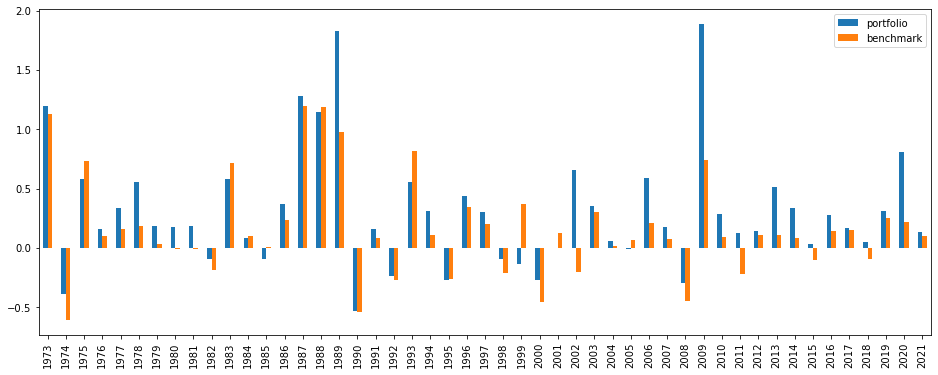

In [17]:
acc_return = Backtest_scale_skew.portfolio_benchmark
annual_acc_return = (acc_return.resample('Y').last() / acc_return.resample('Y').first()) - 1
annual_acc_return.index = [str(i)[0:4] for i in annual_acc_return.index]
annual_acc_return.plot(kind = 'bar', figsize=(16, 6));

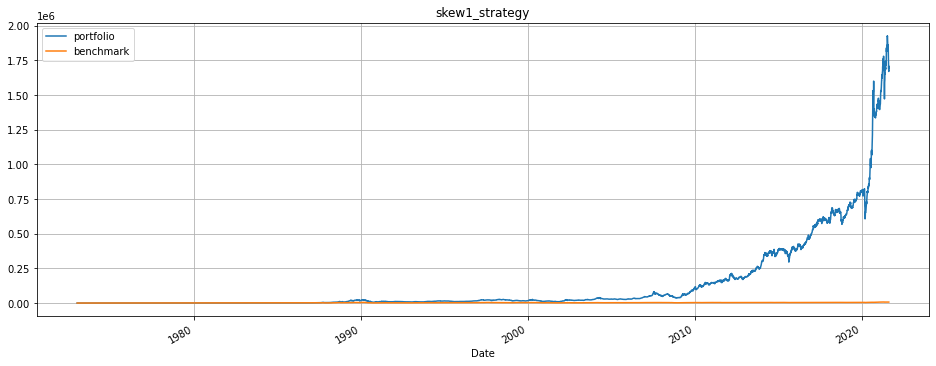

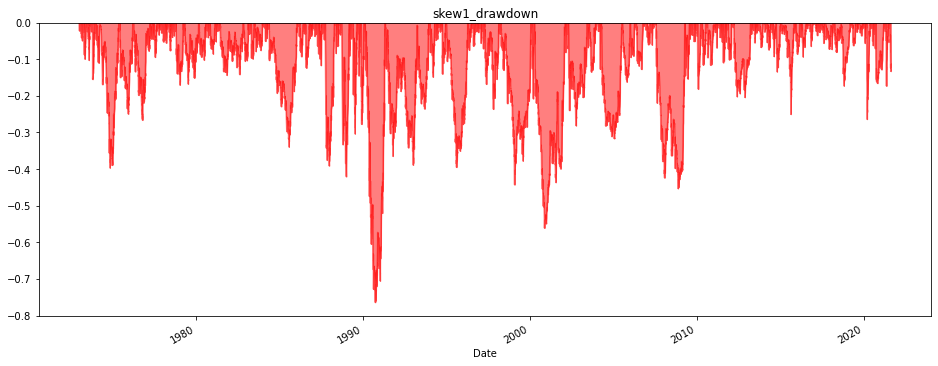

In [18]:
Backtest_scale_skew.show_portfolio()

## 大市值與高偏態

In [19]:
Backtest_scale_skew = Backtest(beginning_money = 100,
                               start_day = '1973-06-01', 
                               scale_select = 'max',
                               scale_num = 200,
                               strategy = 'skew2',
                               feature_select = 'max',
                               feature_period = 240, 
                               stock_num = 25, 
                               max_percentage = 0.04, 
                               rebalance = 240, 
                               dynamic_rebalance = False, 
                               stop_loss = 0.3)

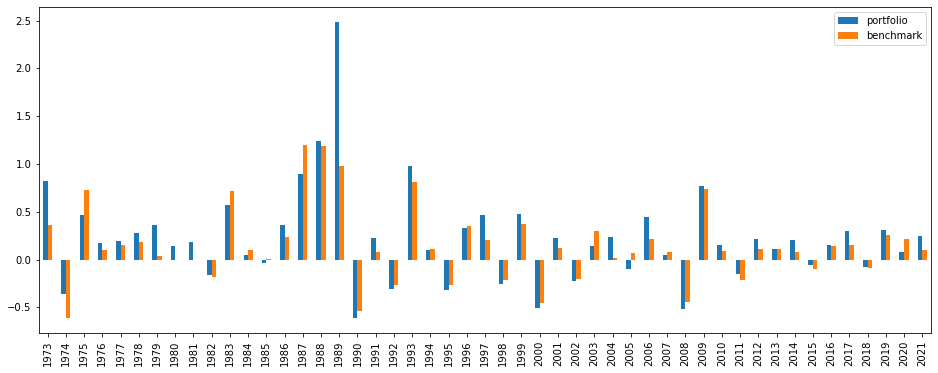

In [20]:
acc_return = Backtest_scale_skew.portfolio_benchmark
annual_acc_return = (acc_return.resample('Y').last() / acc_return.resample('Y').first()) - 1
annual_acc_return.index = [str(i)[0:4] for i in annual_acc_return.index]
annual_acc_return.plot(kind = 'bar', figsize=(16, 6));

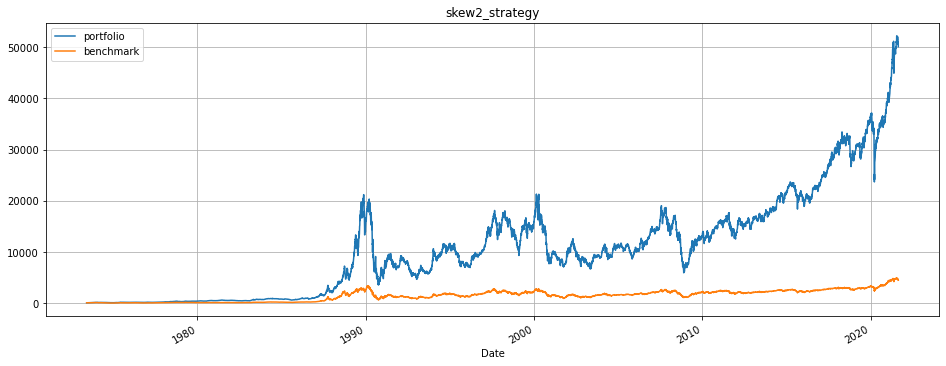

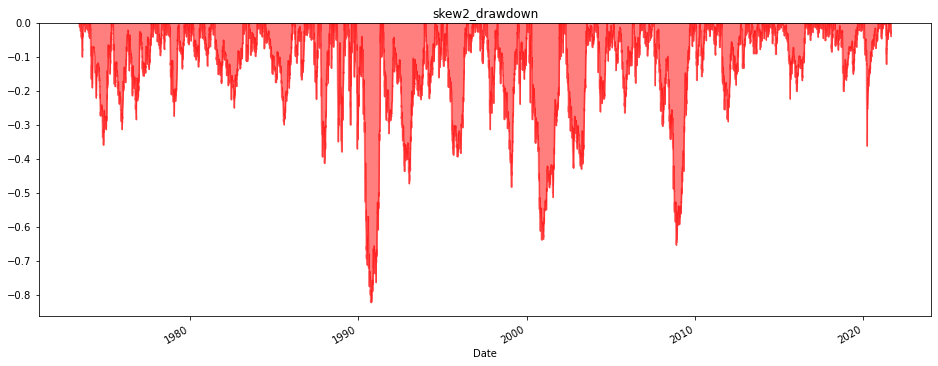

In [21]:
Backtest_scale_skew.show_portfolio()

In [22]:
Backtest_scale_skew.show_index(index = 'All')

 <Strategy> 
 Max_drawdown: 0.8222 
 Accumulation_return: 500.0307 
 Annual_return: 0.1254 
 Annual_volatility: 0.2458 
 Neg_annual_volatility: 0.153 
 Sharpe_ratio: 0.5101 
 Sortino_ratio: 0.8194 
 Calmar_ratio: 0.1525 
 
 <Benchmark> 
 Max_drawdown: 0.7951 
 Accumulation_return: 44.0252 
 Annual_return: 0.075 
 Annual_volatility: 0.2375 
 Neg_annual_volatility: 0.147 
 Sharpe_ratio: 0.3158 
 Sortino_ratio: 0.5104 
 Calmar_ratio: 0.0943


## 數據問題
* yahoo 和 TEJ 的資料差異有點大

In [7]:
import pandas as pd

In [8]:
TW150 = pd.read_csv(path + '/dataset/TW150_CloseAdj.csv', parse_dates=True, index_col='Date')
stock_id = TW150.columns

In [9]:
twStock = pd.read_csv(path + '/dataset/twClose_adj.csv', parse_dates=True, index_col='Date').loc['2004':'2020',stock_id]

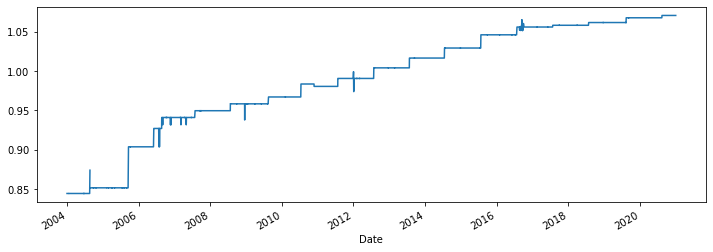

In [10]:
# 1101 為例－傳產
(TW150['1101.TW'] / twStock['1101.TW']).plot(figsize=(12, 4));

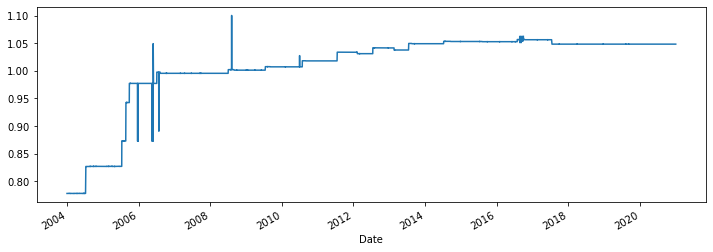

In [11]:
# 2891 為例－金融股
(TW150['2891.TW'] / twStock['2891.TW']).plot(figsize=(12, 4));

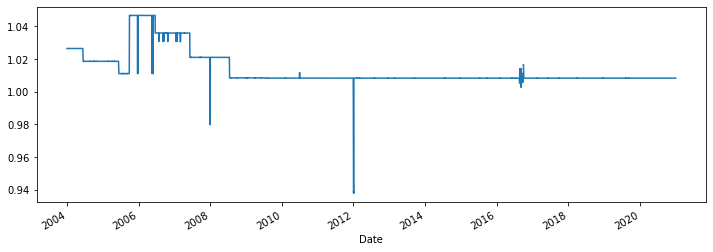

In [12]:
# 2330 為例－電子股
(TW150['2330.TW'] / twStock['2330.TW']).plot(figsize=(12, 4));

## 問題討論
1. 之前做出的穩健高績效，是否是因為事先取出「未來才知道」的市值前 108 檔股票
2. 資料影響其實挺大（測試過但沒有留在這），手邊的歷史資料是否正確其實是個未知數
3. 之前只測試 10 年，也沒有分成樣本內外，是否多數是運氣成份，未來是否能真的獲利或許也是未知數
4. 參數最佳化、機器學習需要擔心，是否為過度優化的資料探勘而找出的隨機性結果（就像執硬幣 10000 次總有全部正面的倖存者）
5. 因子是否有效，我認為至少需考量：持續性、普遍性、穩健性，若真的有效，不應該只在 2006 ~ 2020 有好表現

> 雖然有點打槍自己先前的研究，不過我認為要一直保持著懷疑的態度、探究所有好奇心，總是會有最接近我所追求的結果的一天